In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wec-intelligence-sig-2024-recruitment-task-cv/sample_submission.csv
/kaggle/input/wec-intelligence-sig-2024-recruitment-task-cv/train_images/train_images/real_train/00929.png
/kaggle/input/wec-intelligence-sig-2024-recruitment-task-cv/train_images/train_images/real_train/00704.png
/kaggle/input/wec-intelligence-sig-2024-recruitment-task-cv/train_images/train_images/real_train/00562.png
/kaggle/input/wec-intelligence-sig-2024-recruitment-task-cv/train_images/train_images/real_train/00237.png
/kaggle/input/wec-intelligence-sig-2024-recruitment-task-cv/train_images/train_images/real_train/00406.png
/kaggle/input/wec-intelligence-sig-2024-recruitment-task-cv/train_images/train_images/real_train/00448.png
/kaggle/input/wec-intelligence-sig-2024-recruitment-task-cv/train_images/train_images/real_train/00255.png
/kaggle/input/wec-intelligence-sig-2024-recruitment-task-cv/train_images/train_images/real_train/00435.png
/kaggle/input/wec-intelligence-sig-2024-recruitment-task-cv/tr

In [24]:
import matplotlib.pyplot as plt
import os
from matplotlib import image
from PIL import Image,UnidentifiedImageError
import numpy as np

def load_imgs(impath):
    imgs = []
    labels = []
    ids = []
    
    # List the subdirectories in the train images folder (real images, fake images)
    for label_folder in ['real_train', 'fake_train']:
        label_path = os.path.join(impath, label_folder)
        
        # Assign label based on folder name (real/fake)
        label = 'real' if 'real' in label_folder else 'fake'
        
        # List all image files in the current folder
        image_files = os.listdir(label_path)
        
        for img_file in image_files:
            try:
                filepath = os.path.join(label_path, img_file)
                img = Image.open(filepath)
                
                # Convert image to numpy array and store it
                imgs.append(np.array(img))
                
                # Extract image ID from filename (e.g., image_958.png -> 958)
                img_id = int(img_file.split('_')[-1].split('.')[0])
                ids.append(img_id)
                
                # Append the label
                labels.append(label)
                
            except UnidentifiedImageError as e:
                print(f'Error reading image at file path {filepath}: {e}')
                continue
    
    return np.array(imgs), labels, ids

In [25]:

x_train,y_train,img_ids=load_imgs('/kaggle/input/wec-intelligence-sig-2024-recruitment-task-cv/train_images/train_images')
print(x_train.shape)
print(len(y_train))

(1600, 128, 128, 3)
1600


In [8]:
print(y_train)

['real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'real',

In [26]:
unique_categories, category_counts = np.unique(y_train, return_counts=True)
for i in range(len(unique_categories)):
    print(f"Category '{unique_categories[i]}' occurs {category_counts[i]} times.")

Category 'fake' occurs 800 times.
Category 'real' occurs 800 times.


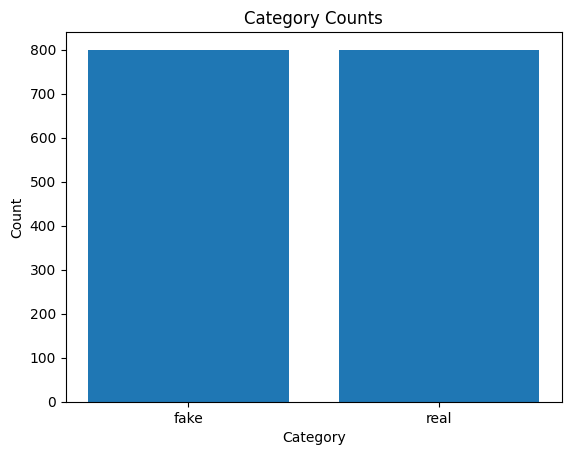

In [20]:
#Plot a bar graph
plt.bar(unique_categories, category_counts)
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [27]:
target=pd.Series(y_train,img_ids,dtype='category')
print(target)

929    real
704    real
562    real
237    real
406    real
       ... 
263    fake
383    fake
370    fake
165    fake
817    fake
Length: 1600, dtype: category
Categories (2, object): ['fake', 'real']


In [28]:
import pandas as pd

#Encoding
target = pd.Series(y_train,img_ids)
encoded_target = target.replace({'real': 0, 'fake': 1})
encoded_target = encoded_target.astype(int)
print(encoded_target)


929    0
704    0
562    0
237    0
406    0
      ..
263    1
383    1
370    1
165    1
817    1
Length: 1600, dtype: int64


In [30]:

import os
import numpy as np
from PIL import Image, UnidentifiedImageError

def load_imgs(impath):
    imgs = []
    ids = []
    

    image_files = os.listdir(impath)
    
    for img_file in image_files:
        try:
            filepath = os.path.join(impath, img_file)
            img = Image.open(filepath)
            
            # Convert image to numpy array and store it
            imgs.append(np.array(img))
            
            # Extract image ID from filename (e.g., image_958.png -> 958)
            img_id = int(img_file.split('_')[-1].split('.')[0])
            ids.append(img_id)
            
        except UnidentifiedImageError as e:
            print(f'Error reading image at file path {filepath}: {e}')
            continue
    
    return np.array(imgs), ids


X_test, test_ids = load_imgs('/kaggle/input/wec-intelligence-sig-2024-recruitment-task-cv/test_images/test_images')


In [11]:
print(X_test.shape)

(400, 128, 128, 3)


In [24]:
#linear regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler

x_train = x_train.reshape(x_train.shape[0], -1) 
X_test = X_test.reshape(X_test.shape[0], -1) 

# Standardizing the feature values 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
X_test = scaler.transform(X_test)

# Initialize Logistic Regression model
model1 = LogisticRegression(max_iter=1000)

y_train=encoded_target

# Train the model on the training data
model1.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Evaluate the model
#accuracy = accuracy_score(X_test, y_pred)
#f1 = f1_score(y_test, y_pred)
#report = classification_report(y_test, y_pred)

# Output the results
#print(f"Accuracy: {accuracy * 100:.2f}%")
#print(f"F1 Score: {f1:.2f}")
#print("\nClassification Report:\n", report)


In [28]:
import pandas as pd



results_df = pd.DataFrame({
    'ID': test_ids,
    'TARGET': y_pred
})
results_df = results_df.sort_values(by='ID', ascending=True)

# Save the DataFrame as a CSV file
results_model1.to_csv('results_linearreg_final.csv', index=False)



In [14]:
#Random Forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler




x_train = x_train.reshape(x_train.shape[0], -1) 
X_test = X_test.reshape(X_test.shape[0], -1) 

# Standardizing the feature values (optional but often recommended for many models)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
X_test = scaler.transform(X_test)
y_train=encoded_target

# Initialize Random Forest model
model_rf=RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train the model on the training data
model_rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)


results_df = pd.DataFrame({
    'ID': test_ids,
    'TARGET': y_pred_rf
})

results_df = results_df.sort_values(by='ID', ascending=True)

# Save the results to a CSV file
results_df.to_csv('results_rf_final.csv', index=False)



In [31]:
#For CNN
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
#from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model

from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define the augmentation transformations to apply
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = datagen.flow(x_train, encoded_target, batch_size=32)




In [32]:
import warnings
warnings.filterwarnings('ignore')
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x_train,encoded_target,test_size=0.2,shuffle=True)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)
train_x=train_x/255.0
test_x=test_x/255.0

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y))

# Assuming x_train has shape (1600, 128, 128, 3) and y_train has shape (1600,)
#history = model.fit(x_train, y_train, epochs=10, batch_size=32)


(1280, 128, 128, 3)
(320, 128, 128, 3)
(1280,)
(320,)
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 486ms/step - accuracy: 0.5450 - loss: 0.7019 - val_accuracy: 0.5375 - val_loss: 0.6670
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 477ms/step - accuracy: 0.6457 - loss: 0.6190 - val_accuracy: 0.6156 - val_loss: 0.6555
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 483ms/step - accuracy: 0.6747 - loss: 0.6064 - val_accuracy: 0.7406 - val_loss: 0.5389
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 469ms/step - accuracy: 0.8127 - loss: 0.4389 - val_accuracy: 0.7688 - val_loss: 0.5214
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 484ms/step - accuracy: 0.8368 - loss: 0.4078 - val_accuracy: 0.8813 - val_loss: 0.2767
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 482ms/step - accuracy: 0.8962 - loss: 0.2466 - val_accuracy: 0.8938 - val_loss: 0.2351
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 473ms/step - accuracy: 0.9454 - loss: 0.1679 - val_accuracy: 0.8781 - val_loss: 0.2795
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 4

In [34]:
import numpy as np
import pandas as pd


X_test = X_test / 255.0  # Rescale test data like you did with train_x

# Generate predictions for X_test
predictions = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int)

# Create a DataFrame to store test IDs and their corresponding predictions
# Assuming 'test_ids' contains the unique identifier for each test sample
submission = pd.DataFrame({
    'ID': test_ids,  # Replace with actual test IDs
    'TARGET': predicted_labels.flatten()  # Flatten to make it a 1D array
})

# Sort the predictions by test IDs in ascending order
submission = submission.sort_values(by='ID')

# Save to CSV
submission.to_csv('predictions_cnn.csv', index=False)

print("Predictions saved to predictions.csv")


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step
Predictions saved to predictions.csv


In [22]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, epochs=10)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 551ms/step - accuracy: 0.5068 - loss: 0.7118
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 543ms/step - accuracy: 0.5011 - loss: 0.6933
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 542ms/step - accuracy: 0.4815 - loss: 0.6932
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 548ms/step - accuracy: 0.5068 - loss: 0.6932
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 542ms/step - accuracy: 0.4959 - loss: 0.6932
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 545ms/step - accuracy: 0.5419 - loss: 0.6915
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 542ms/step - accuracy: 0.4917 - loss: 0.6932
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 542ms/step - accuracy: 0.5170 - loss: 0.6933
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 542ms/step - accuracy: 0.4617 - loss: 0.6938
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 545ms/step - accuracy: 0.4953 - loss: 0.6932


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a generator for rescaling only (no augmentation needed for testing)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Use the flow method without labels (since y_test is unknown)
test_gen = test_datagen.flow(X_test, batch_size=32, shuffle=False)

# Predict on the test data
y_pred_prob = model.predict(test_gen)

# Convert probabilities to binary labels (fake = 1, real = 0)
#y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Save the predictions to a CSV file (assuming test_ids is defined)
results_df = pd.DataFrame({
    'ID': test_ids,
    'TARGET': y_pred
})

# Sort the results by 'ID'
results_df = results_df.sort_values(by='ID')

# Save the DataFrame to a CSV file
results_df.to_csv('results_predictions.csv', index=False)

print("Predictions saved to results_predictions.csv")


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step
Predictions saved to results_predictions.csv
